In [1]:
pip install yfinance


In [7]:
import yfinance as yf
import pandas as pd

# Fetch Tata Steel financial data
ticker = "TATASTEEL.NS"
tata_steel = yf.Ticker(ticker)

# Extract financial data
financials = tata_steel.financials
balance_sheet = tata_steel.balance_sheet

# Get the latest reported year
latest_year = financials.columns[0] if not financials.empty else None

# Function to safely fetch financial data
def get_value(df, row_name):
    try:
        return df.loc[row_name, latest_year] if latest_year in df.columns and row_name in df.index else None
    except KeyError:
        return None

# Fetch required financial metrics
revenue = get_value(financials, "Total Revenue")
net_income = get_value(financials, "Net Income")
total_assets = get_value(balance_sheet, "Total Assets")
total_liabilities = get_value(balance_sheet, "Total Liabilities Net Minority Interest")
shareholders_equity = get_value(balance_sheet, "Stockholders Equity")
current_assets = get_value(balance_sheet, "Current Assets")
current_liabilities = get_value(balance_sheet, "Current Liabilities")

# Store in a DataFrame
data = {
    "Revenue": revenue,
    "Net Income": net_income,
    "Total Assets": total_assets,
    "Total Liabilities": total_liabilities,
    "Shareholders Equity": shareholders_equity,
    "Current Assets": current_assets,
    "Current Liabilities": current_liabilities
}

df = pd.DataFrame(data, index=[latest_year])

# **Financial Ratios Calculation (with error handling)**
df["Current Ratio"] = df["Current Assets"] / df["Current Liabilities"] if df["Current Liabilities"].iloc[0] else None
df["Debt-to-Equity Ratio"] = df["Total Liabilities"] / df["Shareholders Equity"]


In [8]:
# Calculate key financial ratios
df["Return on Assets (ROA)"] = df["Net Income"] / df["Total Assets"]
df["Return on Equity (ROE)"] = df["Net Income"] / df["Shareholders Equity"]
df["Debt-to-Equity Ratio"] = df["Total Liabilities"] / df["Shareholders Equity"]
df["Current Ratio"] = df["Current Assets"] / df["Current Liabilities"]

# Display results
print(df[["Return on Assets (ROA)", "Return on Equity (ROE)", "Debt-to-Equity Ratio", "Current Ratio"]])


            Return on Assets (ROA)  Return on Equity (ROE)  \
2024-03-31               -0.016229               -0.048214   

            Debt-to-Equity Ratio  Current Ratio  
2024-03-31              1.966526       0.716928  


**1️. Low profitability & efficiency**

Negative ROA & ROE suggest Tata Steel is facing financial challenges, possibly due to declining sales or high operational costs.

**2️. High debt burden**

 Debt-to-Equity of 1.97 indicates Tata Steel is highly leveraged, making it risky in times of economic slowdown.

**3️. Liquidity concerns**

 Current Ratio of 0.72 suggests the company might struggle to cover short-term liabilities, increasing the risk of financial stress.

**4️. Possible actions**

 Tata Steel may need to reduce debt, improve cost
efficiency, and enhance cash flows to stabilize its financial position.

<ipython-input-12-8c30395bb0c4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.columns[1:], y=df.iloc[0, 1:], palette="coolwarm")


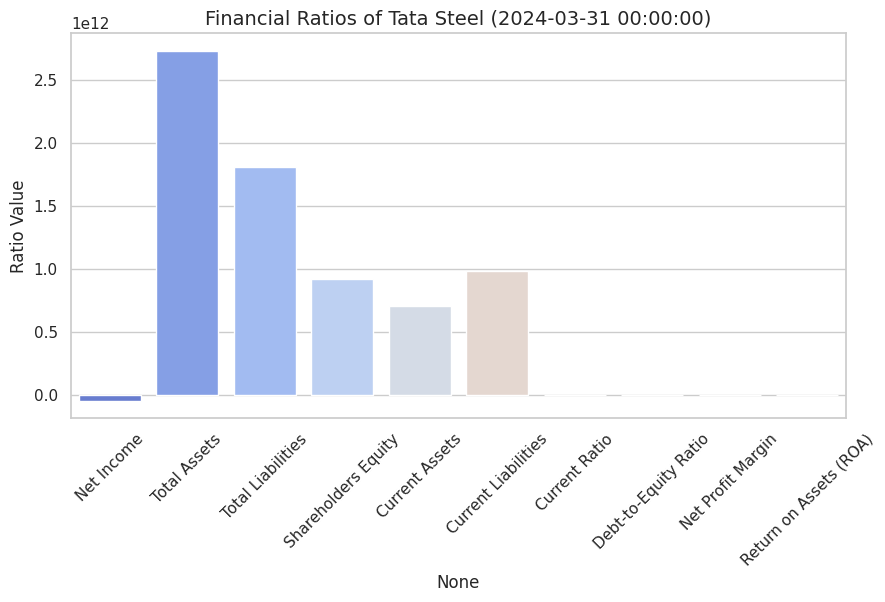

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert DataFrame to long format for visualization
df_long = df.melt(var_name="Metric", value_name="Value")

# Set Seaborn style
sns.set(style="whitegrid")

# **Bar Chart: Financial Ratios**
plt.figure(figsize=(10, 5))
sns.barplot(x=df.columns[1:], y=df.iloc[0, 1:], palette="coolwarm")
plt.title(f"Financial Ratios of Tata Steel ({latest_year})", fontsize=14)
plt.ylabel("Ratio Value")
plt.xticks(rotation=45)
plt.show()


**Key Observations**

**1.**Total Assets are significantly high compared to other metrics.

This suggests Tata Steel has a large asset base, which is crucial for a capital-intensive industry like steel manufacturing.

**2.**Total Liabilities are also large, indicating high leverage.

The company relies heavily on debt, which aligns with the previously discussed Debt-to-Equity Ratio (1.97).

**3.**Net Income is relatively small compared to Total Assets and Liabilities.

This implies that Tata Steel's profitability is low relative to its asset base, which is reflected in the negative ROA (-1.6%).

**4.**Shareholders’ Equity is significantly smaller than Total Assets and Liabilities.

This suggests that a large portion of assets is financed through debt rather than shareholders' funds.

**5.**Current Ratio is less than 1 (~0.72).

This means current liabilities exceed current assets, indicating potential liquidity risks.

**Financial Implications**

High leverage (Debt-to-Equity of 1.97) means the company is using more debt financing, which can increase financial risk.

Low profitability (ROA & Net Profit Margin negative) suggests challenges in generating returns on assets and revenues.

Liquidity concerns: The Current Ratio below 1 suggests Tata Steel might face challenges meeting short-term obligations.

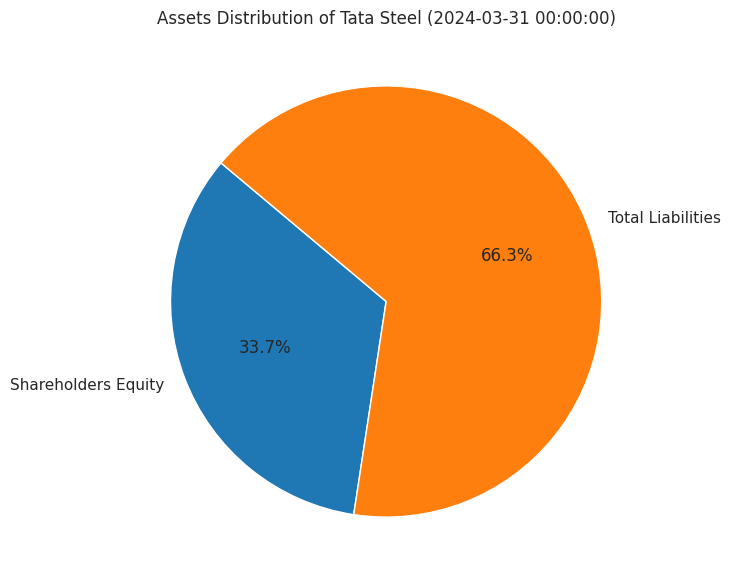

In [11]:
# **Pie Chart: Assets Distribution**
labels = ["Shareholders Equity", "Total Liabilities"]
values = [df["Shareholders Equity"].iloc[0], df["Total Liabilities"].iloc[0]]

plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=["#1f77b4", "#ff7f0e"], startangle=140)
plt.title(f"Assets Distribution of Tata Steel ({latest_year})")
plt.show()

**Key Insights from the Chart**

66.3% of Tata Steel’s total assets are funded by liabilities (debt or other obligations).
This indicates that the company is highly leveraged, meaning it relies significantly on debt to finance its operations.

Only 33.7% of total assets come from shareholders' equity.
This suggests a lower reliance on internal funding and retained earnings.

**Implications**

Higher leverage (more debt) increases financial risk, especially in times of economic downturns or declining revenues.

If the company struggles with cash flow or profitability, it might face challenges in meeting debt obligations.

A Debt-to-Equity Ratio of 1.97 (as calculated earlier) aligns with this high-debt financing structure.